In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### Feature açıklama
* survival --> Survival --> 0 = No, 1 = Yes
* pclass --> Ticket class -->  1 -> 1st(upper), 2 ->  2nd(middle), 3 -> 3rd(lower)
* sex --> cinsiyet / sex
* Age --> Yaş / Age
* sibsp -->  siblings / spouse (kardeş / koca,karı)
* parch -->  parent/child
* ticket --> bilet numarası / ticket number
* fare --> Yolcu ücreti 
* cabin --> Cabin number 
* embarked  --> Binilen Liman --> C = Cherbourg, Q = Queenstown, S = Southampton

#### data copy alma

### EDA

In [4]:
data = train.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
## Silinecek Sütunlar: Name,Ticket,Cabin
data.drop(['Name','Ticket','Cabin'],axis = 1,inplace=True)
test.drop(['Name','Ticket','Cabin'],axis = 1, inplace = True)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

### Missing Value Handling

In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### train dataset

In [11]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


data['Age'] = num_imputer.fit_transform(data[['Age']])
data['Embarked'] = cat_imputer.fit_transform(data[['Embarked']])
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#### test dataset

In [12]:
num_imputer = SimpleImputer(strategy='median')

test['Age'] = num_imputer.fit_transform(test[['Age']])
test['Fare'] = num_imputer.fit_transform(test[['Fare']])
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [13]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

test['Sex'] = le.fit_transform(test['Sex'])
test['Embarked'] = le.fit_transform(test['Embarked'])

### Data Visualization

In [14]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


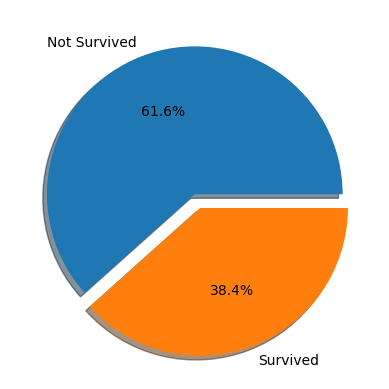

Kazada 891 kişiden yüzde 62 ölmüş!


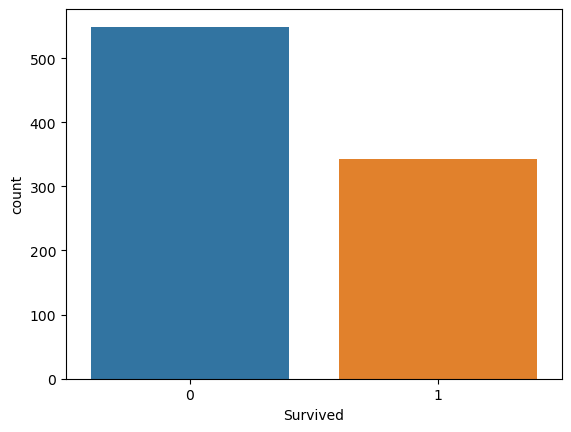

In [15]:
plt.pie(data.Survived.value_counts(),labels=['Not Survived','Survived'],shadow=True,explode=(0,.1),autopct='%1.1f%%');
plt.show();

sns.countplot(x=data['Survived']);
olum_orani = round((data['Survived'].value_counts().values[0]/891)*100)  #Ölen 549 kişinin yüzde haline getirilmesi

print("Kazada 891 kişiden yüzde {} ölmüş!".format(olum_orani))  # Grafiğin üstüne print etmek.

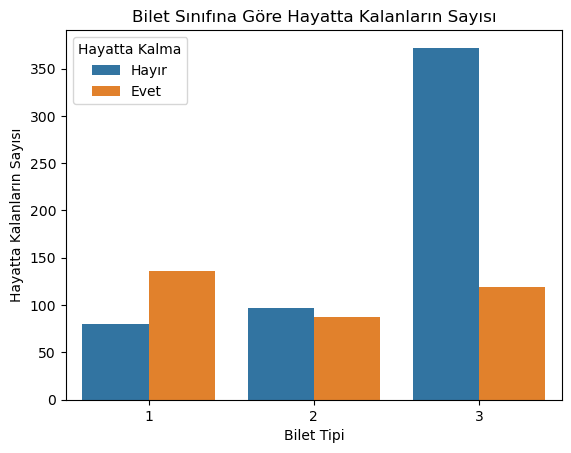

In [16]:
sns.countplot(data=data,x='Pclass',hue='Survived')    #1 > 2 > 3 Bilet tipi
plt.title('Bilet Sınıfına Göre Hayatta Kalanların Sayısı')
plt.legend(loc='upper left',title='Hayatta Kalma',labels=['Hayır','Evet'])
plt.xlabel('Bilet Tipi')
plt.ylabel('Hayatta Kalanların Sayısı')
plt.show()

Daha değerli bilet sınıfının hayatta kalma oranı arasında korelasyon olduğunu açıkça görebiliriz.

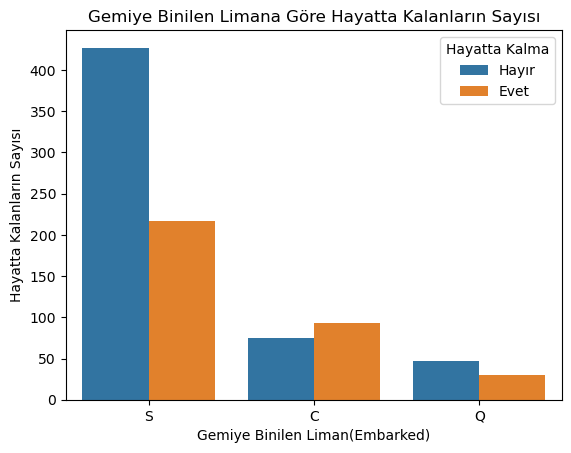

In [17]:
sns.countplot(data=train,x='Embarked',hue='Survived');
plt.legend(title='Hayatta Kalma',labels=['Hayır','Evet'],loc='upper right')
plt.xlabel('Gemiye Binilen Liman(Embarked)')
plt.ylabel('Hayatta Kalanların Sayısı')
plt.title('Gemiye Binilen Limana Göre Hayatta Kalanların Sayısı')
plt.show();

Embarked değişkeni ,yolcuların demografik özellikleri hakkında bilgi verir. Ayrıca bu özellik çizimde de görebileceğimiz gibi hayatta kalma oranıyla oldukça ilgilidir.


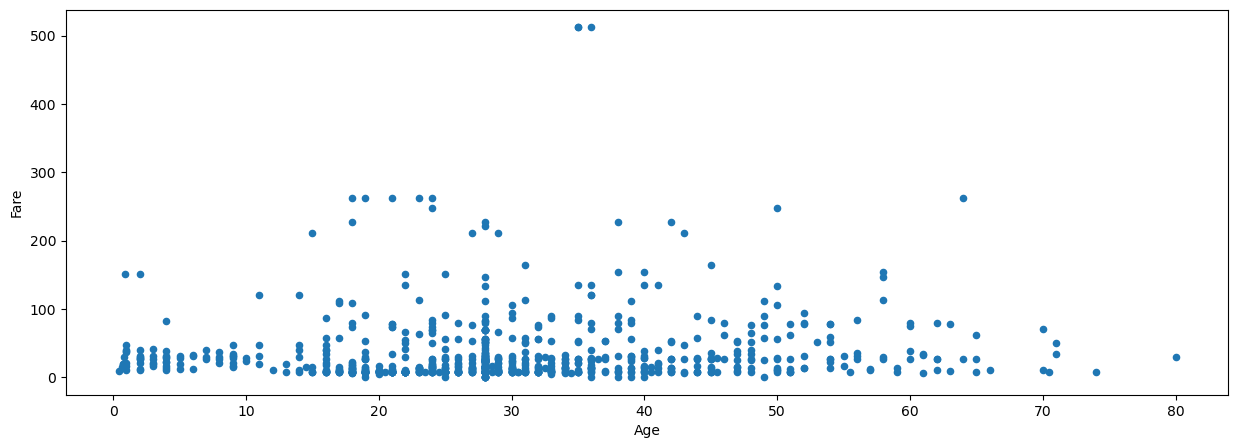

In [18]:
data.plot(figsize = (15,5),x = 'Age',y = 'Fare' ,kind='scatter')
plt.show()
#35-40 yaşlarında 2 kişi 500$ ödemiş bilete.

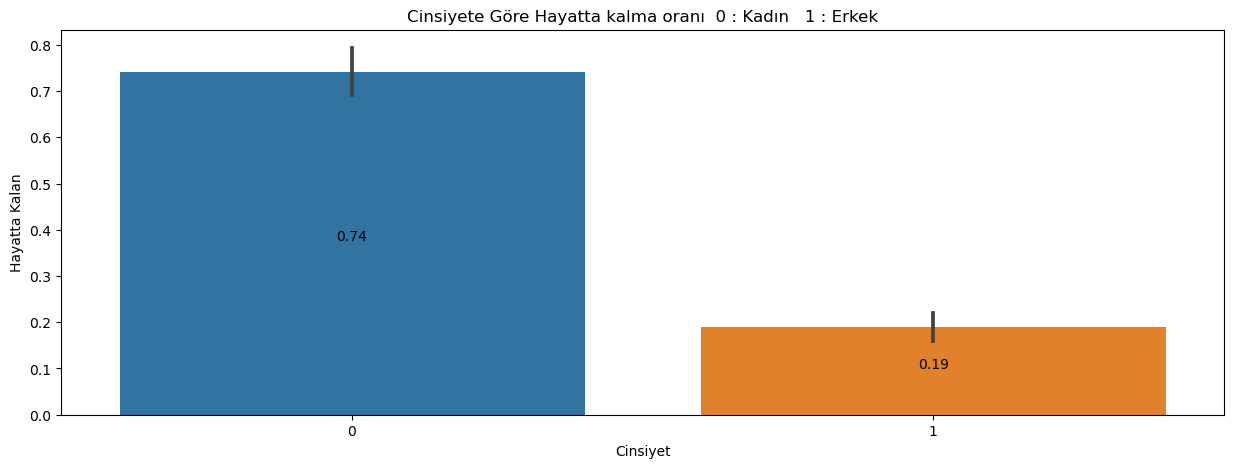

In [19]:
plt.figure(figsize=(15,5))

ax = sns.barplot(data=data, x = 'Sex',y = 'Survived');
# Sütunların üzerine y değerlerini yazdırma 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',   # Yükseklik ()
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),  # Sütunun ortası ve yüksekliği (hem width(genişlik),hem de height(yükseklik) 2 ye böldük ki tam ortasına hizalasın...)
                ha = 'center', va = 'center',  # Merkezde hizalama
                xytext = (0, 5),  # Y değerinin 5 birim yukarısına yazdırma
                textcoords = 'offset points')  # Yazının pozisyonunu ayarlama
plt.title('Cinsiyete Göre Hayatta kalma oranı  0 : Kadın   1 : Erkek')
plt.xlabel('Cinsiyet')
plt.ylabel('Hayatta Kalan')
plt.show()

#### Modelling

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [21]:
rf = RandomForestClassifier()
log_reg = LogisticRegression()
mnb = MultinomialNB()
svm = SVC()
knn = KNeighborsClassifier()

In [22]:
models = {'Random Forest' : rf,
          'Logistic_Regression' : log_reg,
          'MultiNomialNB' : mnb,
          'SVM' : svm,
          'KNeighbors' : knn
    
         }
models.items()

dict_items([('Random Forest', RandomForestClassifier()), ('Logistic_Regression', LogisticRegression()), ('MultiNomialNB', MultinomialNB()), ('SVM', SVC()), ('KNeighbors', KNeighborsClassifier())])

In [23]:
X_train = data.drop('Survived',axis=1)
y_train = data['Survived']

 from sklearn.metrics import accuracy_score
results = {}
for name,model in models.items():
    #Model eğitmek
    model.fit(X_train,y_train)
    #Model tahimini
    preds = model.predict(test)
    

In [24]:
rf.fit(X_train,y_train)
preds = rf.predict(test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
output = pd.DataFrame({'PassengerId' : test['PassengerId'],
                      'Survived' : preds})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
output.to_csv('yarisma.csv',index=False)